In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from click.core import batch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import torchsummary as ts

In [96]:
# Load the dataset
df = pd.read_csv('/Users/defeee/Documents/GitHub/FormAI-ML/Computer_Vision/plank_data.csv')
df

,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_hip_x,left_hip_y,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,label
0,0.642386,0.583271,0.548058,0.597824,0.443711,0.594250,0.403391,0.574825,0.403391,0.574825,0.297642,0.636858,0.297642,0.636858,0.190567,0.676403,0
1,0.679859,0.565745,0.710770,0.591013,0.475935,0.561199,0.481324,0.581487,0.481324,0.581487,0.295335,0.636551,0.295335,0.636551,0.104193,0.658410,0
2,0.721897,0.397889,0.756285,0.455613,0.521475,0.431144,0.528335,0.479965,0.528335,0.479965,0.325305,0.538046,0.141661,0.555853,0.127540,0.576387,0
3,0.761117,0.285076,0.807791,0.315343,0.508633,0.373220,0.516758,0.410588,0.516758,0.410588,0.300992,0.550675,0.108388,0.588610,0.086611,0.607155,2
4,0.670264,0.600633,0.694206,0.643925,0.471349,0.598748,0.479396,0.630939,0.479396,0.630939,0.291745,0.670514,0.124032,0.696069,0.112590,0.707900,0
5,0.730523,0.417255,0.745758,0.443812,0.510914,0.451097,0.518280,0.477669,0.518280,0.477669,0.320076,0.568231,0.320076,0.568231,0.127585,0.588429,0
6,0.638327,0.490312,0.650074,0.520804,0.514262,0.503733,0.514098,0.524496,0.514098,0.524496,0.406551,0.556616,0.406551,0.556616,0.294681,0.585080,0
7,0.760431,0.488503,0.775595,0.527959,0.513389,0.541234,0.510479,0.558777,0.510479,0.558777,0.320399,0.603970,0.320399,0.603970,0.111138,0.598453,0
8,0.758092,0.433545,0.783267,0.439878,0.507335,0.454236,0.508589,0.465711,0.508589,0.465711,0.292282,0.511751,0.120436,0.524580,0.086387,0.536030,0
9,0.448387,0.568642,0.463995,0.538453,0.645906,0.637069,0.645627,0.616969,0.671335,0.912682,0.671335,0.912682,0.815936,0.891380,0.787729,0.843842,2


<Axes: xlabel='label'>

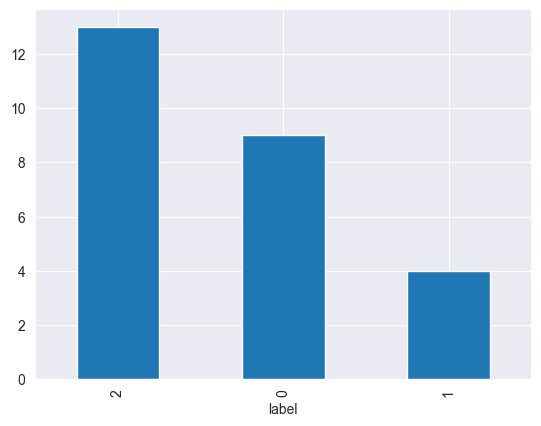

In [97]:
# plot the label distribution between 0, 1 and 2 value counts
df["label"].value_counts().plot(kind='bar')


In [98]:
df.columns

Index(['left_shoulder_x', 'left_shoulder_y', 'right_shoulder_x',
       'right_shoulder_y', 'left_hip_x', 'left_hip_y', 'right_hip_x',
       'right_hip_y', 'left_knee_x', 'left_knee_y', 'right_knee_x',
       'right_knee_y', 'left_ankle_x', 'left_ankle_y', 'right_ankle_x',
       'right_ankle_y', 'label'],
      dtype='object')

In [99]:
# check for missing values
df.isnull().sum()

left_shoulder_x     0
left_shoulder_y     0
right_shoulder_x    0
right_shoulder_y    0
left_hip_x          0
left_hip_y          0
right_hip_x         0
right_hip_y         0
left_knee_x         0
left_knee_y         0
right_knee_x        0
right_knee_y        0
left_ankle_x        0
left_ankle_y        0
right_ankle_x       0
right_ankle_y       0
label               0
dtype: int64

In [100]:
# drop the missing values
df = df.dropna()
df.isnull().sum()

left_shoulder_x     0
left_shoulder_y     0
right_shoulder_x    0
right_shoulder_y    0
left_hip_x          0
left_hip_y          0
right_hip_x         0
right_hip_y         0
left_knee_x         0
left_knee_y         0
right_knee_x        0
right_knee_y        0
left_ankle_x        0
left_ankle_y        0
right_ankle_x       0
right_ankle_y       0
label               0
dtype: int64

# Preprocessing

In [101]:
# Split the dataset into features and labels
X = df.drop('label', axis=1)
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the NumPy arrays to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# Create a DataLoader
trainloader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
testloader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)


In [102]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # with 3 hidden layers with 128 neurons each and ReLU activation and a final output layer with 3 neurons and softmax activation
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(16, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 3),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

In [103]:
# Initialize the model
model = Net()

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [104]:
# Train the model
n_epochs = 15
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    model.train()
    for inputs, targets in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_losses[it] = loss.item()

    model.eval()
    for inputs, targets in testloader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_losses[it] = loss.item()

    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {train_losses[it]:.4f}, Test Loss: {test_losses[it]:.4f}')
    

Epoch 1/15, Train Loss: 1.1020, Test Loss: 1.0618
Epoch 2/15, Train Loss: 1.0510, Test Loss: 0.9961
Epoch 3/15, Train Loss: 0.9523, Test Loss: 0.9498
Epoch 4/15, Train Loss: 0.8930, Test Loss: 0.8972
Epoch 5/15, Train Loss: 0.8240, Test Loss: 0.8626
Epoch 6/15, Train Loss: 0.7449, Test Loss: 0.8685
Epoch 7/15, Train Loss: 0.7114, Test Loss: 0.8729
Epoch 8/15, Train Loss: 0.6633, Test Loss: 0.8699
Epoch 9/15, Train Loss: 0.6494, Test Loss: 0.8659
Epoch 10/15, Train Loss: 0.6513, Test Loss: 0.8685
Epoch 11/15, Train Loss: 0.6467, Test Loss: 0.8758
Epoch 12/15, Train Loss: 0.6406, Test Loss: 0.8791
Epoch 13/15, Train Loss: 0.6511, Test Loss: 0.8742
Epoch 14/15, Train Loss: 0.6124, Test Loss: 0.8382
Epoch 15/15, Train Loss: 0.6020, Test Loss: 1.0282


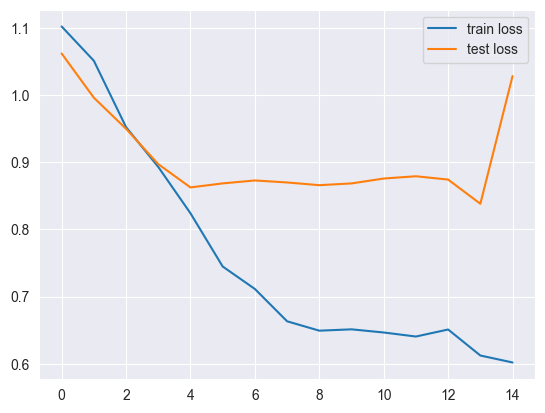

In [105]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()


In [106]:
# Accuracy
n_correct = 0.
n_total = 0.
for inputs, targets in trainloader:
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
train_acc = n_correct / n_total

train_acc
    

0.95

Confusion matrix, without normalization
[[1 1 0]
 [0 1 0]
 [0 2 1]]


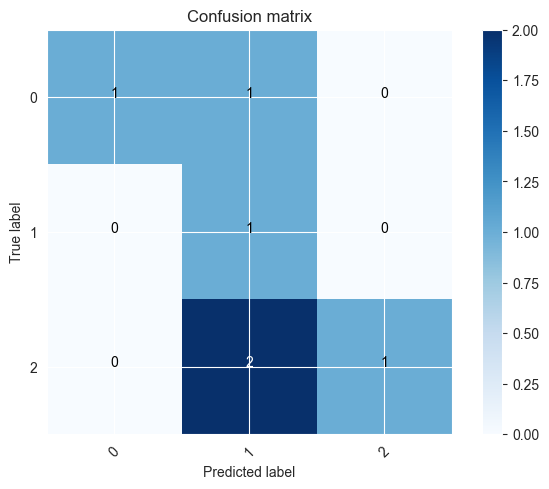

In [107]:
# confusion matrix plot
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# Get all predictions in an array and plot the confusion matrix
model.eval()
predictions = []
targets = []
for inputs, targets_batch in testloader:
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    predictions.extend(preds)
    targets.extend(targets_batch)

predictions = torch.stack(predictions).cpu()
targets = torch.stack(targets).cpu()
cm = confusion_matrix(targets, predictions)
plot_confusion_matrix(cm, list(range(3)))

In [108]:
torch.save(model, '/Users/defeee/Documents/GitHub/FormAI-ML/Models/Core/Plank/model.pth')

In [109]:
df.columns

Index(['left_shoulder_x', 'left_shoulder_y', 'right_shoulder_x',
       'right_shoulder_y', 'left_hip_x', 'left_hip_y', 'right_hip_x',
       'right_hip_y', 'left_knee_x', 'left_knee_y', 'right_knee_x',
       'right_knee_y', 'left_ankle_x', 'left_ankle_y', 'right_ankle_x',
       'right_ankle_y', 'label'],
      dtype='object')

In [110]:
ts.summary(model, (16,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           2,176
              ReLU-2                  [-1, 128]               0
           Dropout-3                  [-1, 128]               0
            Linear-4                  [-1, 128]          16,512
              ReLU-5                  [-1, 128]               0
           Dropout-6                  [-1, 128]               0
            Linear-7                  [-1, 128]          16,512
              ReLU-8                  [-1, 128]               0
           Dropout-9                  [-1, 128]               0
           Linear-10                    [-1, 3]             387
          Softmax-11                    [-1, 3]               0
Total params: 35,587
Trainable params: 35,587
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

# Tensorflow new model creation

In [111]:
import setuptools.dist

import tensorflow as tf

In [112]:
# Load the dataset
df = pd.read_csv('/Users/defeee/Documents/GitHub/FormAI-ML/Computer_Vision/plank_data.csv')
df

,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_hip_x,left_hip_y,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,label
0,0.642386,0.583271,0.548058,0.597824,0.443711,0.594250,0.403391,0.574825,0.403391,0.574825,0.297642,0.636858,0.297642,0.636858,0.190567,0.676403,0
1,0.679859,0.565745,0.710770,0.591013,0.475935,0.561199,0.481324,0.581487,0.481324,0.581487,0.295335,0.636551,0.295335,0.636551,0.104193,0.658410,0
2,0.721897,0.397889,0.756285,0.455613,0.521475,0.431144,0.528335,0.479965,0.528335,0.479965,0.325305,0.538046,0.141661,0.555853,0.127540,0.576387,0
3,0.761117,0.285076,0.807791,0.315343,0.508633,0.373220,0.516758,0.410588,0.516758,0.410588,0.300992,0.550675,0.108388,0.588610,0.086611,0.607155,2
4,0.670264,0.600633,0.694206,0.643925,0.471349,0.598748,0.479396,0.630939,0.479396,0.630939,0.291745,0.670514,0.124032,0.696069,0.112590,0.707900,0
5,0.730523,0.417255,0.745758,0.443812,0.510914,0.451097,0.518280,0.477669,0.518280,0.477669,0.320076,0.568231,0.320076,0.568231,0.127585,0.588429,0
6,0.638327,0.490312,0.650074,0.520804,0.514262,0.503733,0.514098,0.524496,0.514098,0.524496,0.406551,0.556616,0.406551,0.556616,0.294681,0.585080,0
7,0.760431,0.488503,0.775595,0.527959,0.513389,0.541234,0.510479,0.558777,0.510479,0.558777,0.320399,0.603970,0.320399,0.603970,0.111138,0.598453,0
8,0.758092,0.433545,0.783267,0.439878,0.507335,0.454236,0.508589,0.465711,0.508589,0.465711,0.292282,0.511751,0.120436,0.524580,0.086387,0.536030,0
9,0.448387,0.568642,0.463995,0.538453,0.645906,0.637069,0.645627,0.616969,0.671335,0.912682,0.671335,0.912682,0.815936,0.891380,0.787729,0.843842,2


In [113]:
X = df.drop('label', axis=1)

y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train = np.array(X_train).reshape(20,16)
X_test = np.array(X_test).reshape(6,16)

y_train = tf.one_hot(y_train, 3)
y_test = tf.one_hot(y_test, 3)

(20, 16) (6, 16) (20,) (6,)


In [114]:
# create best model structure, do not follow our previous model structure
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, input_shape=(16,), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])


/Users/defeee/venvs/venv_311/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [115]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 512)            │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,555 (2.04 MB)

 Trainable params: 535,555 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [116]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [117]:
model.fit(
    X_train, y_train, 
    batch_size=64,
    validation_data=(X_test, y_test),
    epochs=10000
)

Epoch 1/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - acc: 0.1000 - loss: 1.1229 - val_acc: 0.5000 - val_loss: 0.9986
Epoch 2/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - acc: 0.5000 - loss: 0.9683 - val_acc: 0.5000 - val_loss: 0.9966
Epoch 3/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.6500 - loss: 0.9488 - val_acc: 0.5000 - val_loss: 0.9439
Epoch 4/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.5000 - loss: 0.9559 - val_acc: 0.3333 - val_loss: 1.1522
Epoch 5/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.6000 - loss: 0.9669 - val_acc: 0.5000 - val_loss: 0.9448
Epoch 6/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - acc: 0.5000 - loss: 0.9127 - val_acc: 0.5000 - val_loss: 1.0310
Epoch 7/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.6500 - loss: 0.8182 - val_acc: 0.6667 - val_loss: 0.8646
Epoch 8/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - acc: 0.7000 - loss: 0.7930 - val_acc: 0.5000 - val_loss: 1.0601
Epoch 9/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc:

In [123]:
model.save('/Users/defeee/Documents/GitHub/FormAI-ML/Models/Core/Plank/model1000epochs.h5')

In [124]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 512)            │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,071,112 (4.09 MB)

 Trainable params: 535,555 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 535,557 (2.04 MB)

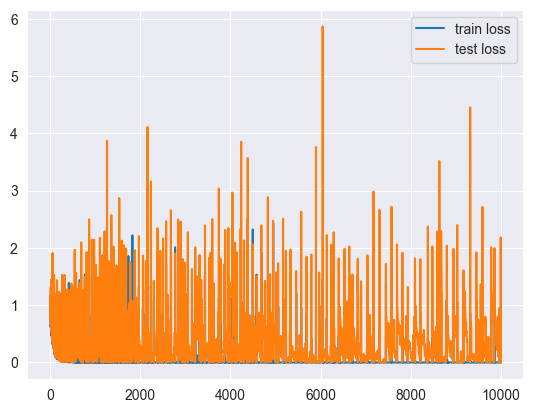

In [125]:
# training epochs vs loss and validation
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

Compare the two models and see which one is better

In [126]:
# Load the models
model_torch = torch.load('/Users/defeee/Documents/GitHub/FormAI-ML/Models/Core/Plank/model.pth')
model_tf = tf.keras.models.load_model('/Users/defeee/Documents/GitHub/FormAI-ML/Models/Core/Plank/model1000epochs.h5')


/var/folders/rb/h3rl5sw15s587zkvrd3b6wy40000gn/T/ipykernel_20265/912930034.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_torch = torch.load('/Users/defeee/Docume

In [127]:
# Get the predictions
model_torch.eval()

Net(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=16, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=128, out_features=3, bias=True)
    (10): Softmax(dim=1)
  )
)

Confusion matrix, without normalization
[[1 1 0]
 [0 1 0]
 [0 2 1]]


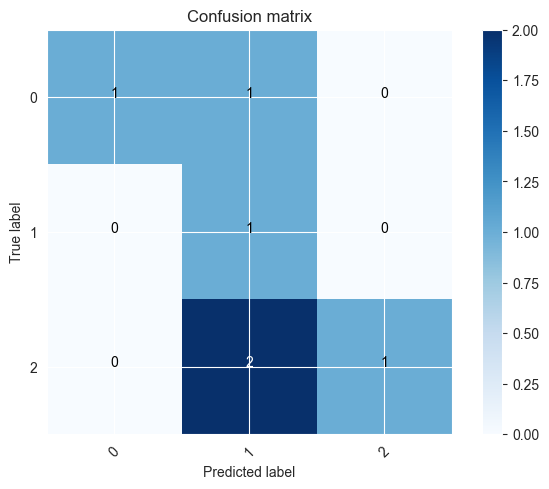

In [128]:
predictions_torch = []
targets_torch = []
for inputs, targets_batch in testloader:
    outputs = model_torch(inputs)
    _, preds = torch.max(outputs, 1)
    predictions_torch.extend(preds)
    targets_torch.extend(targets_batch)
    
predictions_torch = torch.stack(predictions_torch).cpu()
targets_torch = torch.stack(targets_torch).cpu()
cm_torch = confusion_matrix(targets_torch, predictions_torch)
plot_confusion_matrix(cm_torch, list(range(3)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Confusion matrix, without normalization
[[2 0 0]
 [0 1 0]
 [0 0 3]]


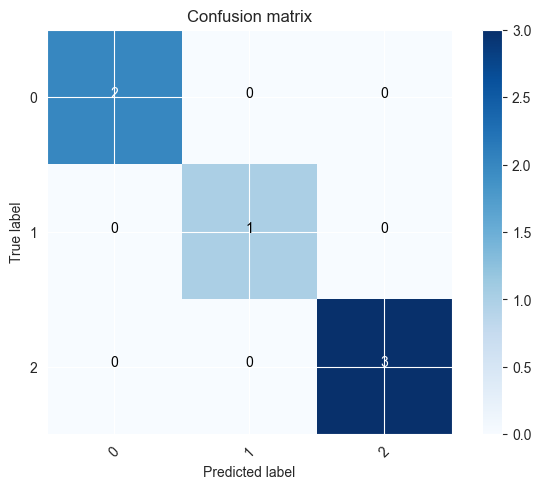

In [129]:
predictions_tf = model_tf.predict(X_test)
predictions_tf = np.argmax(predictions_tf, axis=1)
cm_tf = confusion_matrix(np.argmax(y_test, axis=1), predictions_tf)
plot_confusion_matrix(cm_tf, list(range(3)))

In [130]:
# Accuracy
n_correct = 0.
n_total = 0.
for inputs, targets in trainloader:
    outputs = model_torch(inputs)
    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
train_acc = n_correct / n_total

train_acc

0.95

In [131]:
# Accuracy
n_correct = 0.
n_total = 0.
for inputs, targets in trainloader:
    outputs = model_tf.predict(inputs)
    predictions = np.argmax(outputs, axis=1)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]
train_acc = n_correct / n_total

train_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


0.95

In [ ]:
# test the tf model on an unseen image

In [132]:
# Load the dataset

df = pd.read_csv('/Users/defeee/Documents/GitHub/FormAI-ML/Computer_Vision/plank_data2.csv')
df

,left_shoulder_x,left_shoulder_y,right_shoulder_x,right_shoulder_y,left_hip_x,left_hip_y,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,label
0,0.210904,0.698602,0.233404,0.675384,0.469948,0.70828,0.470926,0.697895,0.664869,0.729949,0.664869,0.729949,0.852906,0.770941,0.835942,0.769182,0


In [133]:
# Load the models
model_tf = tf.keras.models.load_model('/Users/defeee/Documents/GitHub/FormAI-ML/Models/Core/Plank/model1000epochs.h5')

In [135]:
#split the dataset
X = df.drop('label', axis=1)
y = df['label']

# predict the label based on the X values
predictions = model_tf.predict(X)
predictions = np.argmax(predictions, axis=1)
predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([1])